In [101]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from sinkhorn import sinkhorn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Tests of Sinkhorn() with exact Gibbs kernel
### Initialization of managable variables:

In [102]:
# Points:
n=50**2 
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x=x[:,np.newaxis]
y=y[:,np.newaxis]
# Cost:
C = (x-y.T)**2
# entropy factor:
eta = 1 # il manque W <- W/eta dans l'algo alors garder eta=1
# (exact) Kernel:
Kmat = np.exp(-eta*C)
def K(v):
    return Kmat@v
def Kt(v):
    return (Kmat.T)@v
# Target marginals:
p = np.ones((n,1))
p = p / np.sum(p)
q = np.ones((n,1))
q = q / np.sum(q) 
# tolerance:
delta = 1e-15

### Sinkhorn projection computation:

W = -15.495059339847522
W = -15.495059339847527 (with other calculation)
Marginal error: 2.393376295761751e-16


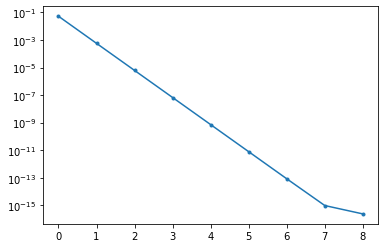

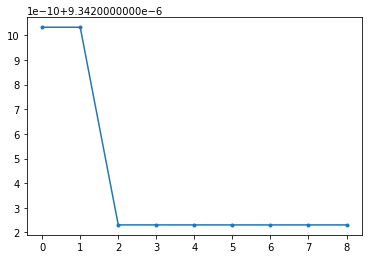

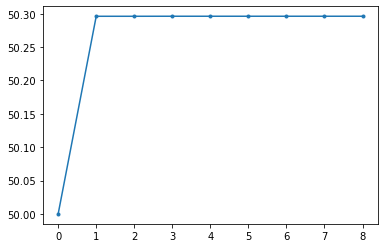

In [103]:
# Sinkhorn:
u,v,W,norm_u,norm_v,err = sinkhorn(K,Kt,p,q,delta,maxtime=10)
# Coupling:
P = u*Kmat*v.T
# Objective function:
Wbis = np.sum(C*P) - 1/eta * np.sum(P * np.log(1/P))
# Display:
print("W =",W)
print("W =",Wbis,"(with other calculation)")
print("Marginal error:",err[-1])
plt.semilogy(err,".-")
plt.figure()
plt.plot(norm_u,".-")
plt.figure()
plt.plot(norm_v,".-")

### Conclusions of test 1.
**Seem now to work well**. Marginal error **converge to zero with high precision and quite fast** for dimensions under $100^2$. The scallings vectors norms converge also to a certain value, showing the **stability of the convergence**. They do not necessarily have the same amplitude.

It remains to understand if the coding line that **increase the suport** is usefull.

Note que $W$ est **calculé faux dans le paper**, il manque un facteur $\eta^{-1}$, c'est embêtant parce $\eta$ est pas un paramètre de Sinkhorn mais caché dans le $K$. **Garder $\eta=1$** pour éviter le problème...